In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from datetime import datetime

#### This is to display all the columns & avoid warning while updating the copied dataframe

In [2]:
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

In [3]:
# load the csv into dataframe & used low_memory=False for the memory warning
loan_df = pd.read_csv("loan.csv", low_memory=False)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### check shape & column details

In [4]:
print(loan_df.shape) # (39717, 111)
print(loan_df.info(verbose = True))

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17

### 1. Data Understanding
##### Removing columns that are NA, duplicate & have null values more than threshload.
##### For this exercise we are taking the threshload as 35% 
##### Then remove the columns that doesn't seem relevant for this execise

In [5]:
def findNonNullColumns(loan_df, fraction):
    return loan_df[loan_df.columns[loan_df.isnull().sum() < fraction * len(loan_df)]].columns

In [6]:
print(findNonNullColumns(loan_df, 0.35))

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


#### Keeping these above columns & removing other from the dataframe

In [7]:
loan_df_first = loan_df[findNonNullColumns(loan_df, 0.35)]

In [8]:
loan_df_first.shape

(39717, 54)

#### After validating the data dictionary & data removing columns with only one type of value, primary key columns(id/memberid) & non-relevant columns(url/title)
#### Keeping these 
#### 'loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment',
#### 'grade','sub_grade','emp_title','emp_length','home_ownership','annual_inc','verification_status','loan_status',
#### 'purpose','zip_code','addr_state','dti','pub_rec_bankruptcies','term','issue_d','loan_status'

In [9]:
loan_df_clean = loan_df_first[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership','annual_inc','verification_status','loan_status','purpose','zip_code','addr_state','dti','pub_rec_bankruptcies','issue_d']]

In [10]:
loan_df_clean.shape #(39717, 20)

(39717, 20)

In [11]:
#drop duplicate rows

In [12]:
loan_df_clean.drop_duplicates(inplace = True)

In [13]:
loan_df_clean.shape #(39717, 20) hence no duplicate

(39717, 20)

In [14]:
loan_df_clean.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_d
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,860xx,AZ,27.65,0.0,Dec-11
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00,0.0,Dec-11


### 2. Data Cleaning & Manipulation
##### remove unnecessary rows like - loan status as Current.
##### manipulate date, string fields to be applicabe for the analysis
##### fix missing values


In [15]:
loan_df_clean['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [16]:
# To analyse this data only 'Fully Paid' & 'Charged Off' need to be consider as for 'Current' we can't make any prediction.
loan_df_second = loan_df_clean[loan_df_clean['loan_status'] != 'Current']
loan_df_second.shape

(38577, 20)

In [17]:
# updating term to remove month from suffix 
loan_df_second['term'] = loan_df_second['term'].str.rstrip(' months').astype('int')

In [18]:
loan_df_second['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [19]:
#split the issue date to get the month of loan
loan_df_second['issue_d'] = pd.to_datetime(loan_df_second['issue_d'], format='%b-%y')
loan_df_second['issue_month'] = loan_df_second['issue_d'].dt.month

In [20]:
#remove % from interest rate & convert it to round number
loan_df_second['int_rate'] = loan_df_second['int_rate'].str.rstrip('%').astype('float')
loan_df_second['int_rate'] = loan_df_second['int_rate'].round().astype('int')

In [21]:
loan_df_second['loan_status_num'] = loan_df_second['loan_status'].map({'Charged Off':1, 'Fully Paid':0})

In [22]:
loan_df_second.shape

(38577, 22)

In [23]:
#### check the missing values & fill them
loan_df_second.isnull().sum().sort_values(ascending = False)

emp_title               2386
emp_length              1033
pub_rec_bankruptcies     697
loan_amnt                  0
verification_status        0
issue_month                0
issue_d                    0
dti                        0
addr_state                 0
zip_code                   0
purpose                    0
loan_status                0
annual_inc                 0
funded_amnt                0
home_ownership             0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt_inv            0
loan_status_num            0
dtype: int64

In [24]:
#to fill the blank values for title we can assume that they do some small business & their emp length is hard to analyse so we can take the mode
loan_df_second.emp_title.fillna('Self Business', inplace = True)
loan_df_second.emp_length.fillna( loan_df_second.emp_length.mode()[0] ,inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_20884\1962947628.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df_second.emp_title.fillna('Self Business', inplace = True)
C:\Users\admin\AppData\Local\Temp\ipykernel_20884\1962947628.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [25]:
# for pub_rec_bankruptcies we can assume non of then is bank rupt in public 
loan_df_second.pub_rec_bankruptcies.fillna(0.0, inplace = True)

C:\Users\admin\AppData\Local\Temp\ipykernel_20884\1455584946.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df_second.pub_rec_bankruptcies.fillna(0.0, inplace = True)


In [26]:
loan_df_second.isnull().sum().sort_values(ascending = False)

loan_amnt               0
funded_amnt             0
issue_month             0
issue_d                 0
pub_rec_bankruptcies    0
dti                     0
addr_state              0
zip_code                0
purpose                 0
loan_status             0
verification_status     0
annual_inc              0
home_ownership          0
emp_length              0
emp_title               0
sub_grade               0
grade                   0
installment             0
int_rate                0
term                    0
funded_amnt_inv         0
loan_status_num         0
dtype: int64

#### 2.1 Outliers cleanup

In [27]:
loan_df_second.int_rate.describe()

count    38577.00000
mean        11.92327
std          3.68394
min          5.00000
25%          9.00000
50%         12.00000
75%         14.00000
max         24.00000
Name: int_rate, dtype: float64

In [28]:
loan_df_second.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#### distribution seems wise for both loan amount & interest rate, hence no change here

In [29]:
loan_df_second.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

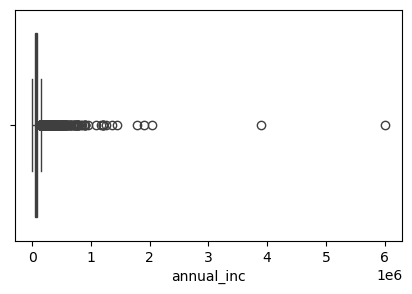

In [30]:
plt.figure(figsize=(5,3))
sns.boxplot(loan_df_second, x ='annual_inc')
plt.show()

In [31]:
loan_df_second.annual_inc.quantile([0.5, 0.75,0.85, 0.95,0.99])

0.50     58868.0
0.75     82000.0
0.85    100000.0
0.95    140004.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [32]:
# this column has outliers hence we have to consider the values only till 95 percentile
loan_df_final = loan_df_second[loan_df_second.annual_inc < loan_df_second.annual_inc.quantile(0.95)]
loan_df_final.annual_inc.describe()

count     36642.000000
mean      60829.831120
std       27717.831464
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77704.050000
max      140000.000000
Name: annual_inc, dtype: float64

In [33]:
### 2.2 Create Bins for doing the analysis

In [34]:
loan_df_final['loan_amnt_cat'] = pd.cut(loan_df_final['loan_amnt'], [0,8000,16000, 24000, 32000], labels=['0-8k','8k-16k','16k-24k', '24k+']) 
loan_df_final['int_rate_cat'] = pd.cut(loan_df_final['int_rate'], [0,10,12.5, 15, 20], labels=['0-10 %','10-12.5 %','12.5-15 %', '15+ %']) 
loan_df_final['dti_cat'] = pd.cut(loan_df_final['dti'], [0,5,10,15,20,25], labels=['0-5','5-10','10-15', '15-20', '20+']) 


In [35]:
loan_df_final.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_d,issue_month,loan_status_num,loan_amnt_cat,int_rate_cat,dti_cat
0,5000,5000,4975.0,36,11,162.87,B,B2,Self Business,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,860xx,AZ,27.65,0.0,2011-12-01,12,0,0-8000,10-12.5,NaN
1,2500,2500,2500.0,60,15,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00,0.0,2011-12-01,12,1,0-8000,12.5-15,0-5
2,2400,2400,2400.0,36,16,84.33,C,C5,Self Business,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,606xx,IL,8.72,0.0,2011-12-01,12,0,0-8000,15+,5-10
3,10000,10000,10000.0,36,13,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,917xx,CA,20.00,0.0,2011-12-01,12,0,8000-16000,12.5-15,15-20
5,5000,5000,5000.0,36,8,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,852xx,AZ,11.20,0.0,2011-12-01,12,0,0-8000,0-10,10-15


In [36]:
loan_df_final.dti.value_counts()


dti
0.00     170
18.00     44
12.00     42
19.20     39
13.20     38
        ... 
28.41      1
26.46      1
27.69      1
26.61      1
25.43      1
Name: count, Length: 2848, dtype: int64

### 3 Analysis - Univariate

In [37]:
loan_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36642 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36642 non-null  int64         
 1   funded_amnt           36642 non-null  int64         
 2   funded_amnt_inv       36642 non-null  float64       
 3   term                  36642 non-null  int32         
 4   int_rate              36642 non-null  int32         
 5   installment           36642 non-null  float64       
 6   grade                 36642 non-null  object        
 7   sub_grade             36642 non-null  object        
 8   emp_title             36642 non-null  object        
 9   emp_length            36642 non-null  object        
 10  home_ownership        36642 non-null  object        
 11  annual_inc            36642 non-null  float64       
 12  verification_status   36642 non-null  object        
 13  loan_status          

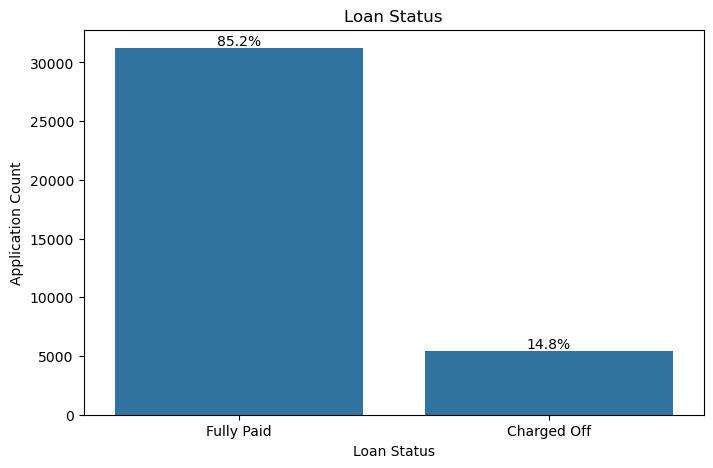

In [38]:
# Analysis on loan status
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='loan_status', data=loan_df_final)
ax.set(title = 'Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Application Count')
percentages = loan_df_final.loan_status.value_counts()/ len(loan_df_final.loan_status) * 100
ax.bar_label(container=ax.containers[0], labels= [f'{p:.1f}%' for p in percentages])
plt.show()

#### Above analysis says 15% of loans get charged off.

### Analysis on home ownership

In [39]:
def createPlot(loan_df_final, parameter):
    plt.figure(figsize=(10,5))
    ax = sns.countplot(loan_df_final, x = parameter, hue='loan_status')
    ax.set(title = "Analysis on " + str.upper(parameter).replace("_", " "))
    ax.set_xlabel(str.upper(parameter).replace("_", " "))
    ax.set_ylabel('Application Count')
    plt.show();

In [40]:
def createPlotwithoutStatus(loan_df_final, parameter):
    plt.figure(figsize=(10,5))
    ax = sns.countplot(loan_df_final, x = parameter)
    ax.set(title = "Analysis on " + str.upper(parameter).replace("_", " "))
    ax.set_xlabel(str.upper(parameter).replace("_", " "))
    ax.set_ylabel('Application Count')
    plt.show();

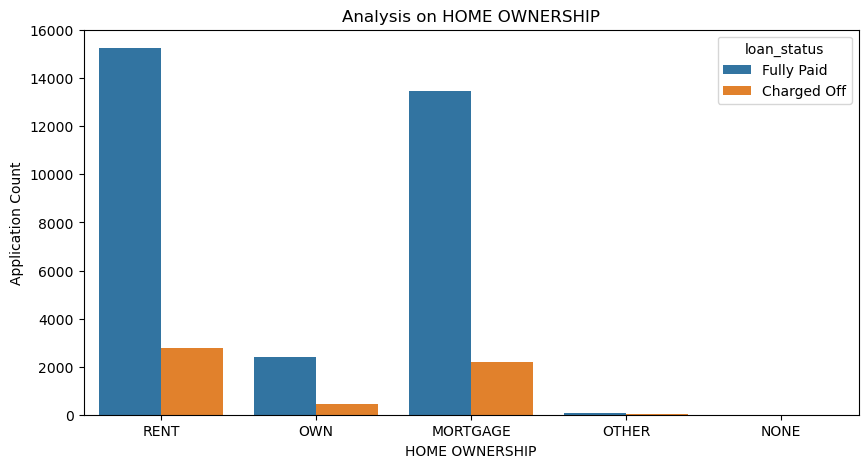

In [41]:
createPlot(loan_df_final, 'home_ownership')

#### above analysis states that most of the applicants live in rented or mortgage & hence have high chances of default.

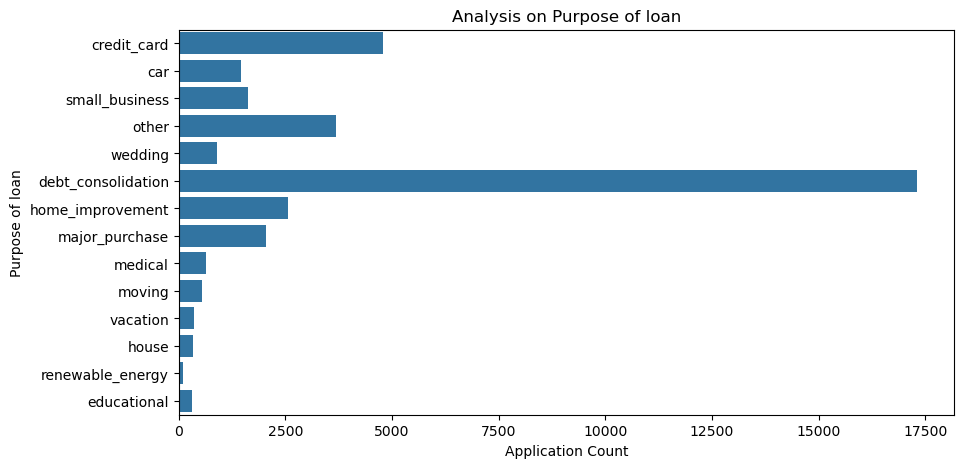

In [42]:
# on purpose of Loan
plt.figure(figsize=(10,5))
ax = sns.countplot(loan_df_final, y = 'purpose')
ax.set(title = "Analysis on Purpose of loan")
ax.set_xlabel('Application Count')
ax.set_ylabel('Purpose of loan')
plt.show()


#### Above analysis states that most of the loans are for debt consolidation

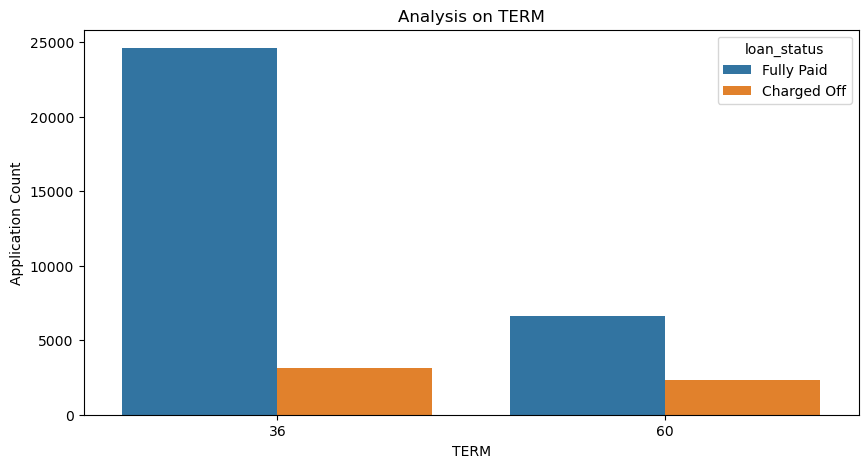

In [43]:
createPlot(loan_df_final, 'term')

In [44]:
#### above analysis states that most of the loan were taken for 36 month duration.

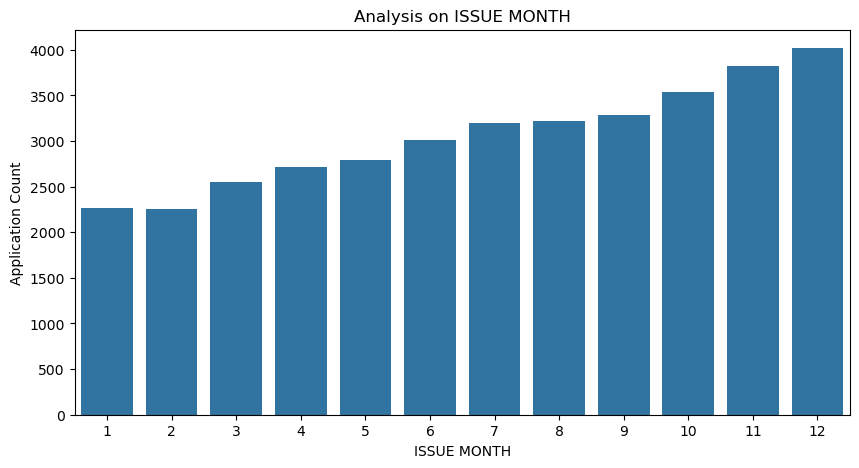

In [45]:
# on issue month
createPlotwithoutStatus(loan_df_final,'issue_month')

#### Above analysis states that most of the loans were taken during Holidays season.

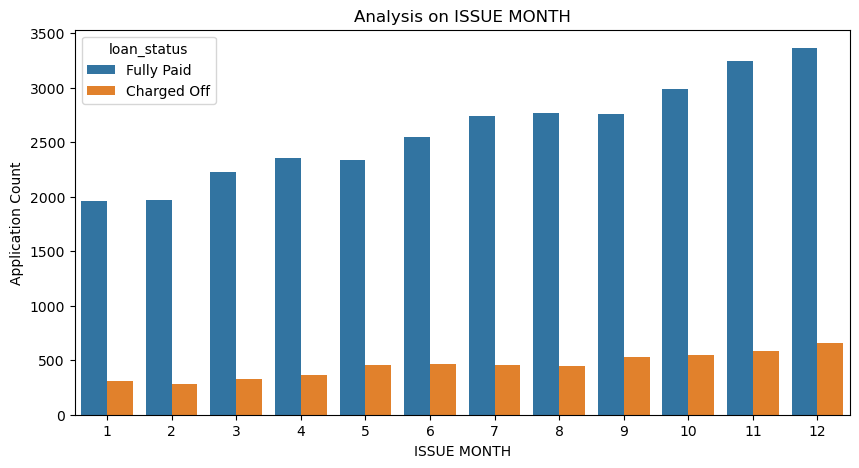

In [46]:
# on issue month

createPlot(loan_df_final, 'issue_month')

#### Above analysis states that volume of default is also high during holidays season, but percentage wise its not much difference.

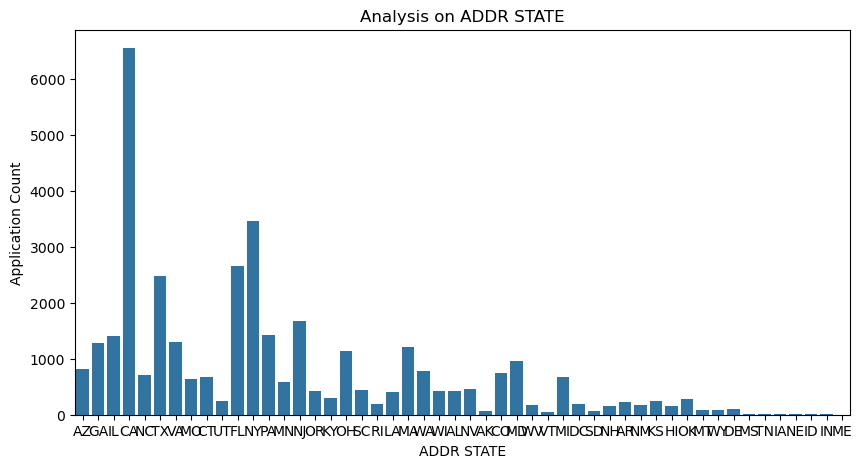

In [47]:
createPlotwithoutStatus(loan_df_final, 'addr_state')

#### Top states taking loans are CA, NY, FL, TX due to high living standards & requirements.

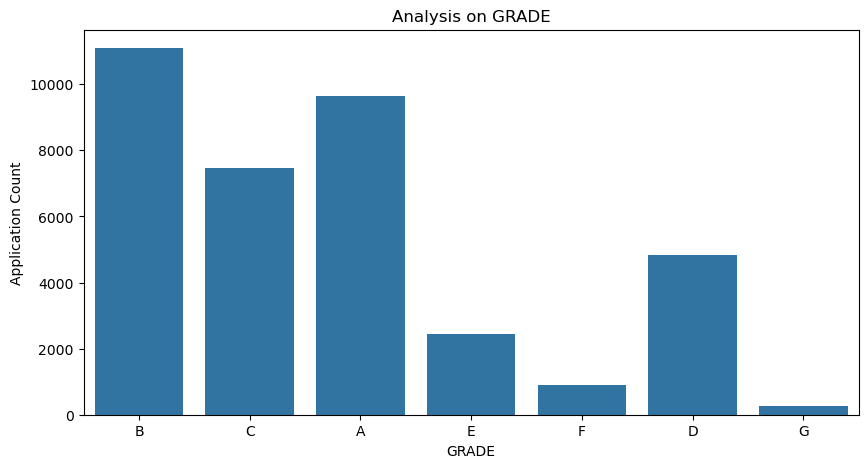

In [48]:
# on Loan Grade
createPlotwithoutStatus(loan_df_final, 'grade')

#### grade A B C took the highest loan among all grades.

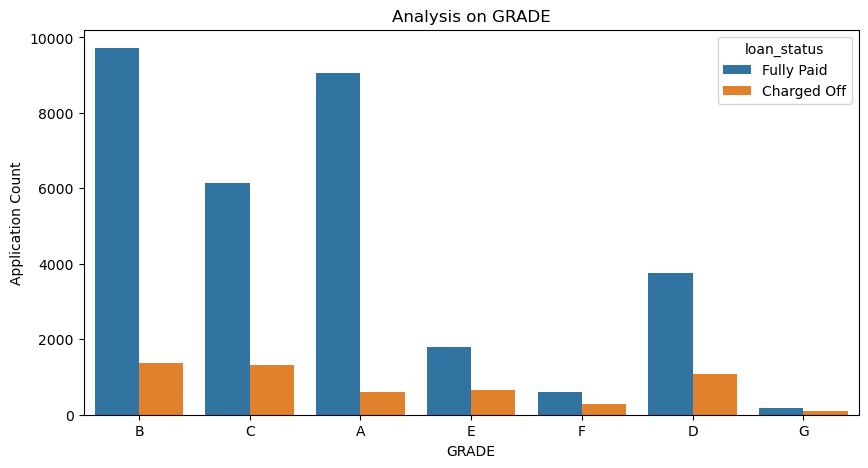

In [49]:
createPlot(loan_df_final, 'grade')

#### Percentage wise lower grade have high default rate.

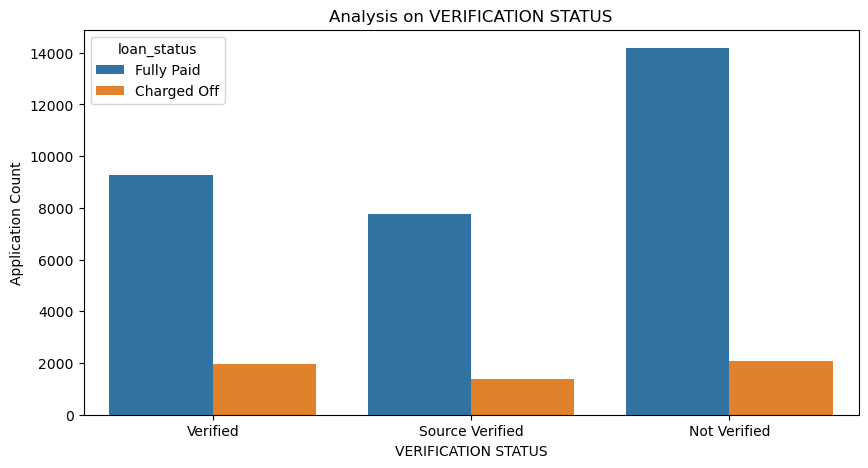

In [50]:
createPlot(loan_df_final, 'verification_status')

#### Above analysis states that most of the allication are not verified, which is not good.

In [51]:
# Univariate analysis on amount Salary, interest rates, loan amount

def createBoxPlot(loan_df_final, parameter):
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(loan_df_final, x = parameter)
    ax.set(title = "Box plot analysis on " + str.upper(parameter).replace("_", " "))
    ax.set_xlabel(str.upper(parameter).replace("_", " "))
    #ax.set_ylabel('Application Count')
    plt.show();

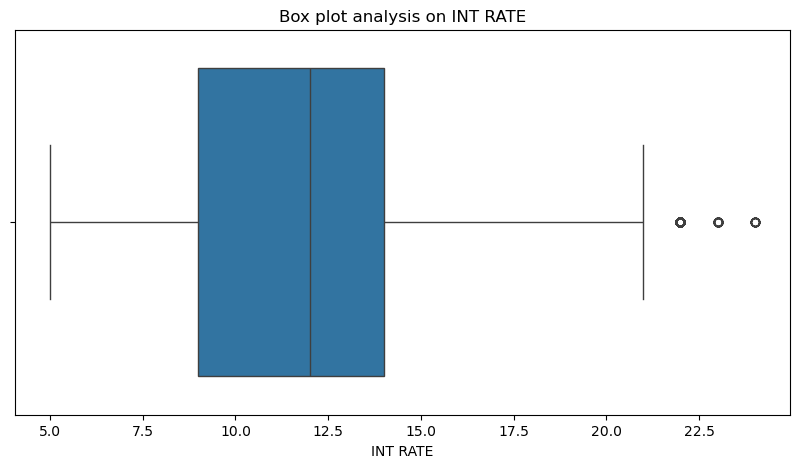

In [52]:
createBoxPlot(loan_df_final, 'int_rate')

#### Interest rate vary b/w 9-13%

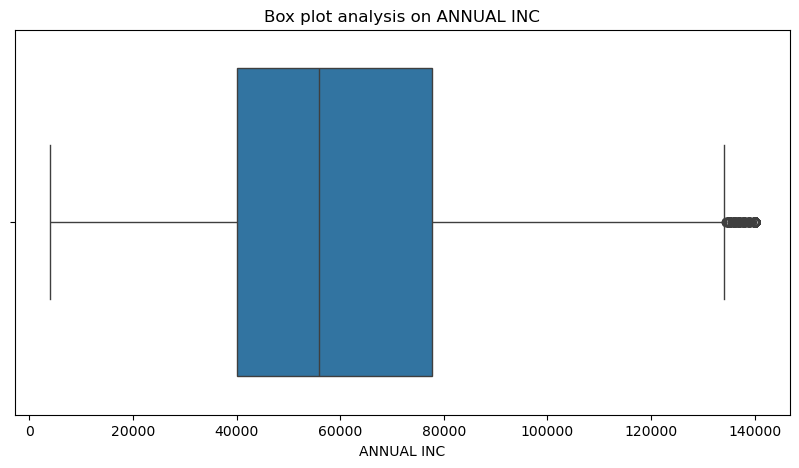

In [53]:
createBoxPlot(loan_df_final, 'annual_inc')

#### Annual Salary lies b/w 40000-75000 USD

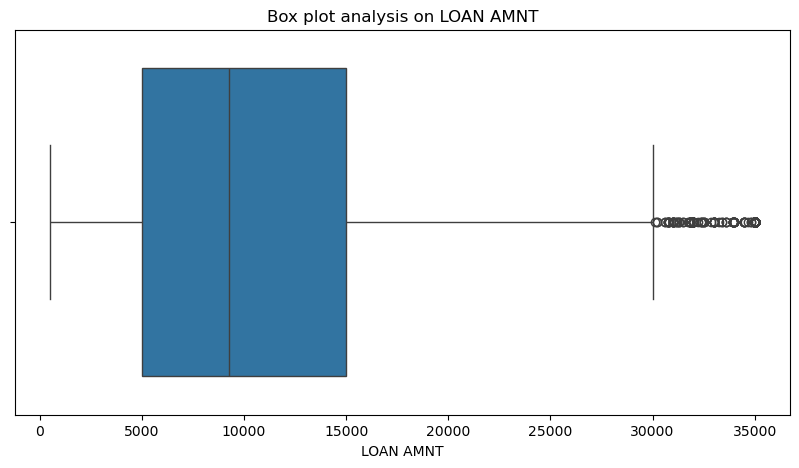

In [54]:
createBoxPlot(loan_df_final, 'loan_amnt')

#### Loan amount varies b/w 5000 to 15000 USD

## Bivariate Analysis


In [55]:
loan_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36642 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36642 non-null  int64         
 1   funded_amnt           36642 non-null  int64         
 2   funded_amnt_inv       36642 non-null  float64       
 3   term                  36642 non-null  int32         
 4   int_rate              36642 non-null  int32         
 5   installment           36642 non-null  float64       
 6   grade                 36642 non-null  object        
 7   sub_grade             36642 non-null  object        
 8   emp_title             36642 non-null  object        
 9   emp_length            36642 non-null  object        
 10  home_ownership        36642 non-null  object        
 11  annual_inc            36642 non-null  float64       
 12  verification_status   36642 non-null  object        
 13  loan_status          

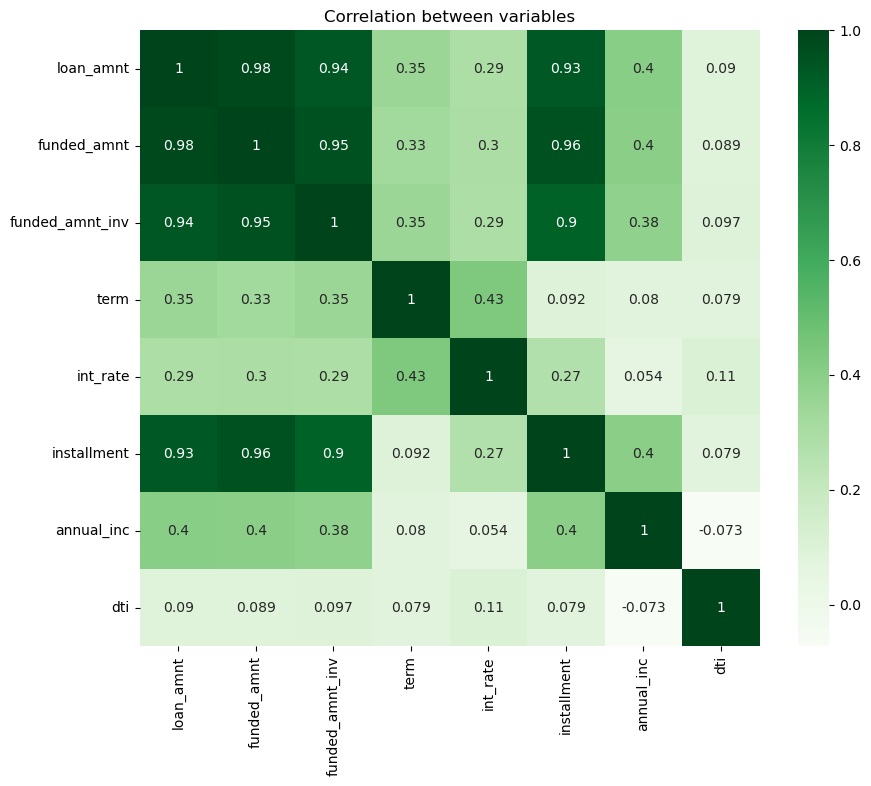

In [56]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(loan_df_final[['loan_amnt','funded_amnt', 'funded_amnt_inv','term','int_rate','installment','annual_inc', 'dti']].corr(),cmap='Greens', annot=True)
plt.title("Correlation between variables")
plt.show()

### Observations:
#### loan amount, funded amount & funded amount inv have high correlation
#### installment & loan amount are positive correlation
#### annual income & dti are slightly negative correlation.
#### Positive correlation b/w annual income & funded amount means person with good annual income get more loan. 

In [57]:
def createBivariantePlot(df_data,feature,label_rotation=False):
    plt.figure(figsize=(10,8))
    sns.set(font_scale=1)

    # Calculate the percentage of loan_status_new =1 per category value
    cat_perc = df_data[[feature, 'loan_status_num']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='loan_status_num', ascending=False, inplace=True)
    
    s = sns.barplot(x = feature, y='loan_status_num', data=cat_perc)
    s.set(title= feature.replace("_"," ").title()+' Vs. Charged off %')

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    plt.ylabel('Charged off %')
    plt.tick_params(axis='both', which='major')
    plt.subplots_adjust(wspace=0.2, top=0.9)
    plt.show();

In [58]:
loan_df_final.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'pub_rec_bankruptcies',
       'issue_d', 'issue_month', 'loan_status_num', 'loan_amnt_cat',
       'int_rate_cat', 'dti_cat'],
      dtype='object')

C:\Users\admin\AppData\Local\Temp\ipykernel_20884\3264673630.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_perc = df_data[[feature, 'loan_status_num']].groupby([feature],as_index=False).mean()


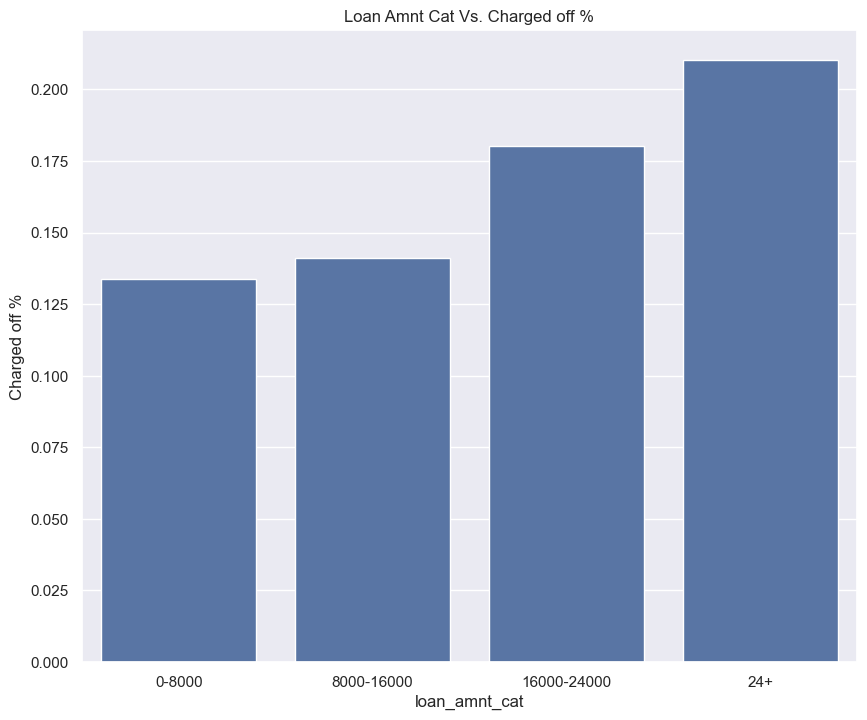

In [59]:
createBivariantePlot(loan_df_final, 'loan_amnt_cat')

#### Above stats states that more the loan amount higer the chances of default, suggestion is to keep the loam amount less than 24K USD

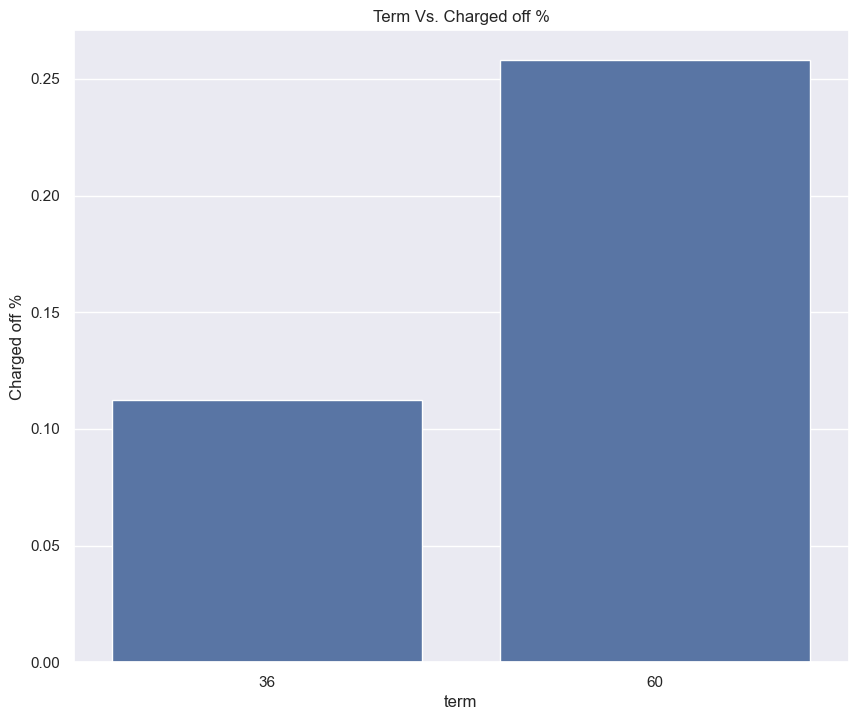

In [60]:
createBivariantePlot(loan_df_final, 'term')

#### Above stats states that with high tenure the chances of default is high.

C:\Users\admin\AppData\Local\Temp\ipykernel_20884\3264673630.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_perc = df_data[[feature, 'loan_status_num']].groupby([feature],as_index=False).mean()


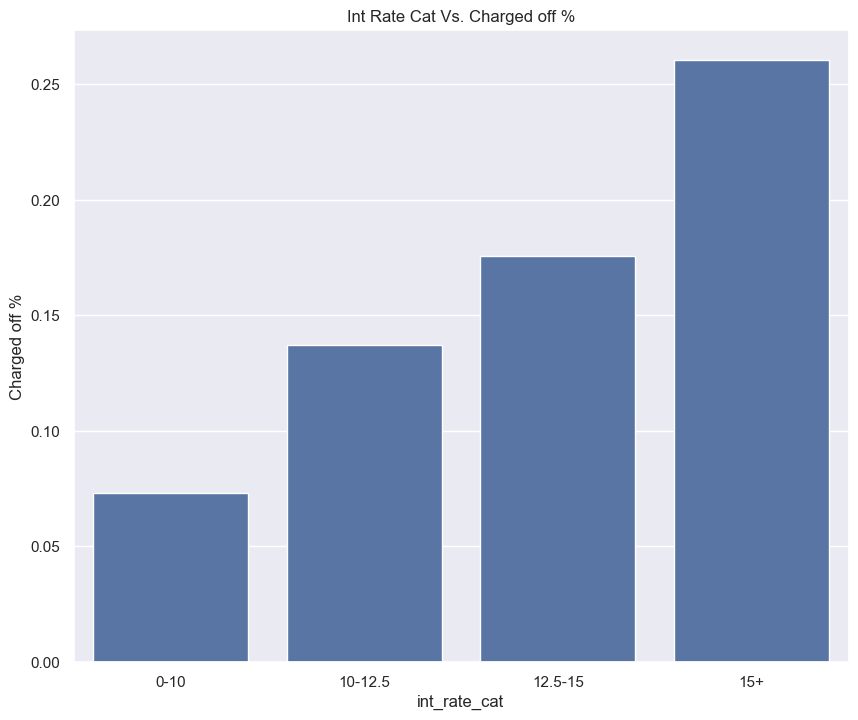

In [61]:
createBivariantePlot(loan_df_final, 'int_rate_cat')

#### Above stats states that higher the interest rate, higher the change of default.

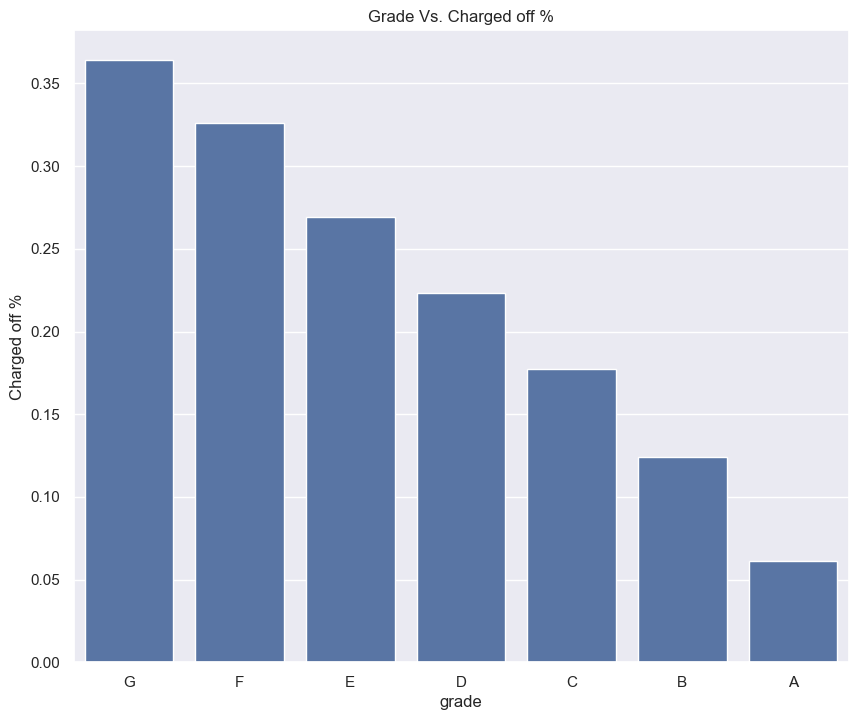

In [62]:
createBivariantePlot(loan_df_final, 'grade')

#### Above stats states that  grade A, B, C have higer chances to returning the loan.

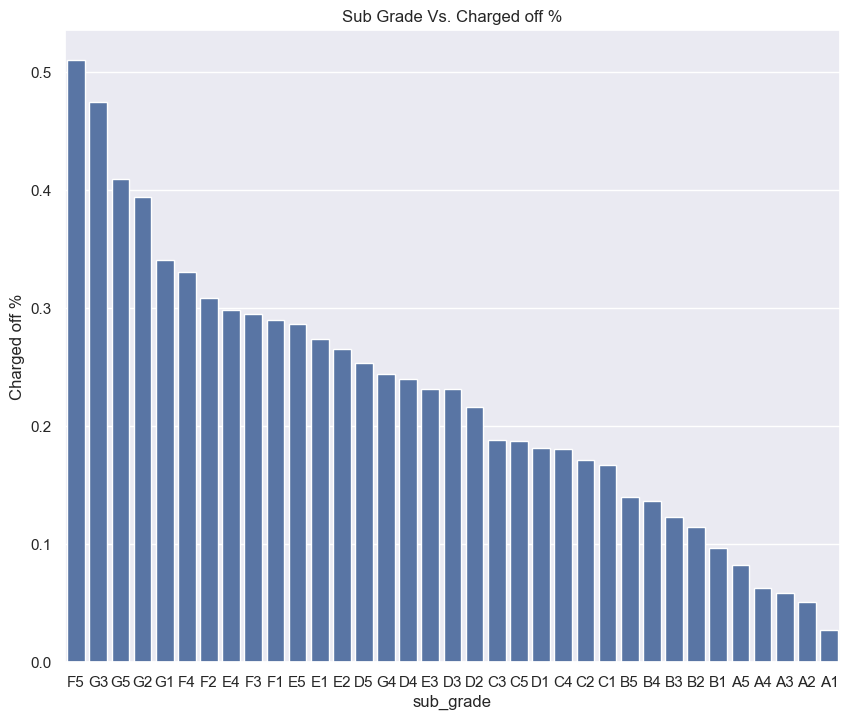

In [63]:
createBivariantePlot(loan_df_final, 'sub_grade')

#### Above stats states that even with lower grade, F5, G3 & G5 have higher chances of default.

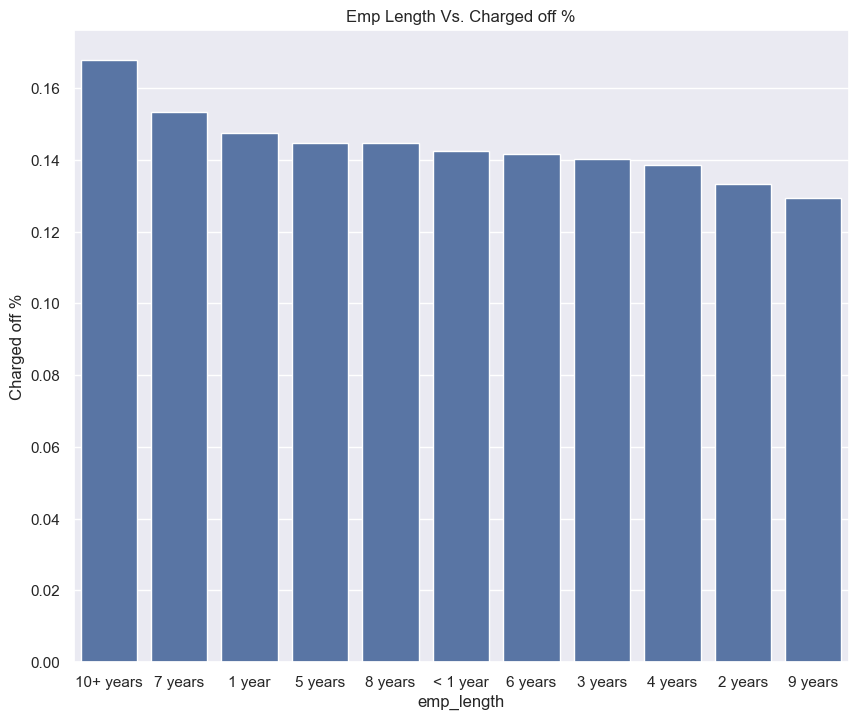

In [64]:
createBivariantePlot(loan_df_final, 'emp_length')

#### Above stats states that employee with more than 10 years of exp have high chance of default due to other commitments

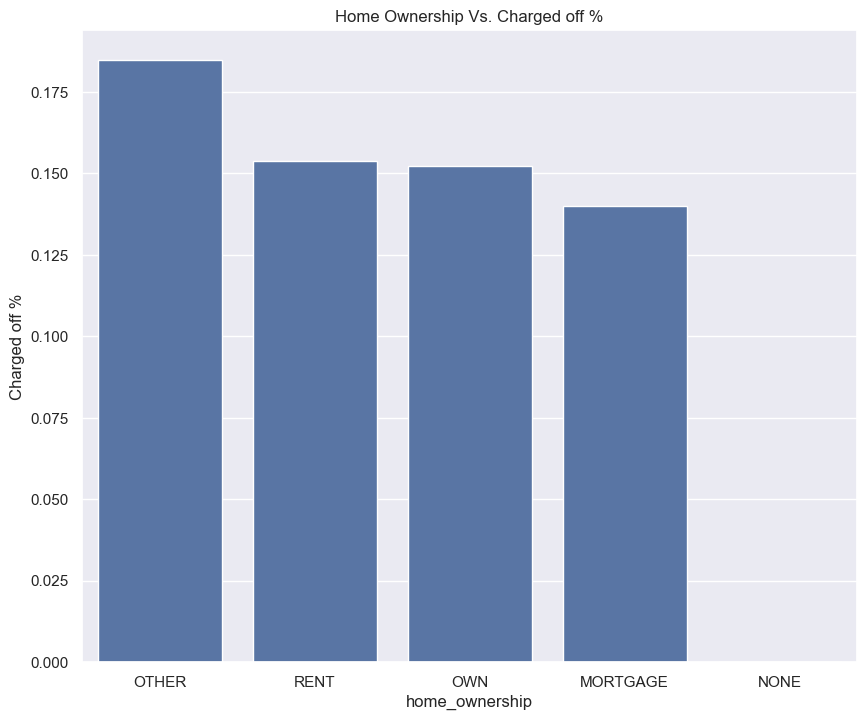

In [65]:
createBivariantePlot(loan_df_final, 'home_ownership')

#### Above stats states that Home owner - Own/Morgage have higer chance of returning the loan as they don't have to pay the rent.

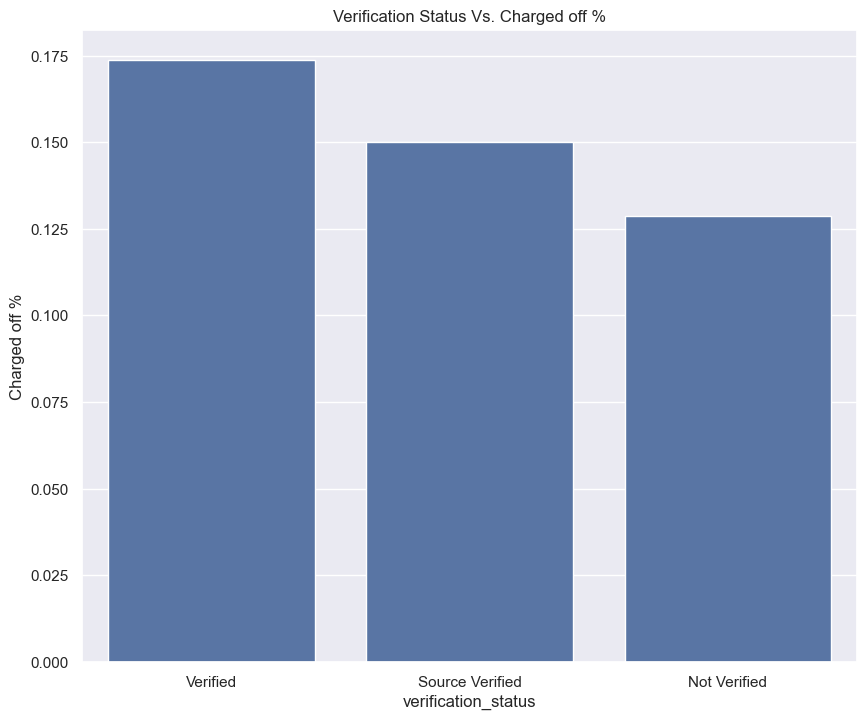

In [66]:
createBivariantePlot(loan_df_final, 'verification_status')

#### Above stats states that verified user are getting default, could be verification is not done correctly

C:\Users\admin\AppData\Local\Temp\ipykernel_20884\3264673630.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


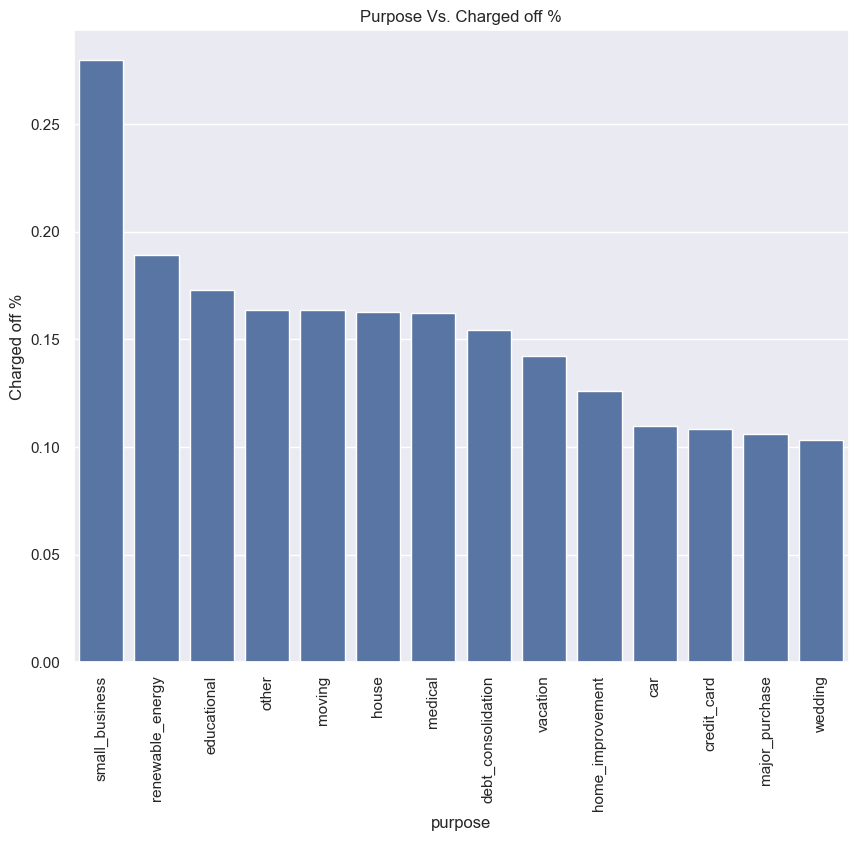

In [67]:
createBivariantePlot(loan_df_final, 'purpose', True)

#### Above stats states that small businesss owner & renewable energy employee are unable to pay loan on time.

C:\Users\admin\AppData\Local\Temp\ipykernel_20884\3264673630.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


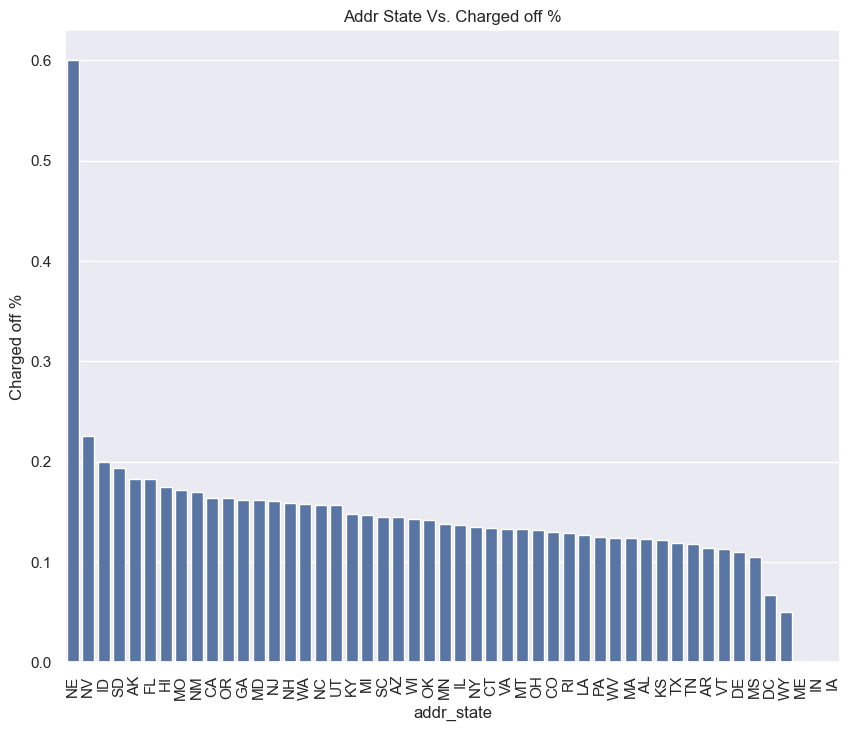

In [68]:
createBivariantePlot(loan_df_final, 'addr_state',True)

#### Above stats states that NE, NV , ID states have higher chances of getting default, so we should validate the loan processes in those states.

C:\Users\admin\AppData\Local\Temp\ipykernel_20884\3264673630.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_perc = df_data[[feature, 'loan_status_num']].groupby([feature],as_index=False).mean()


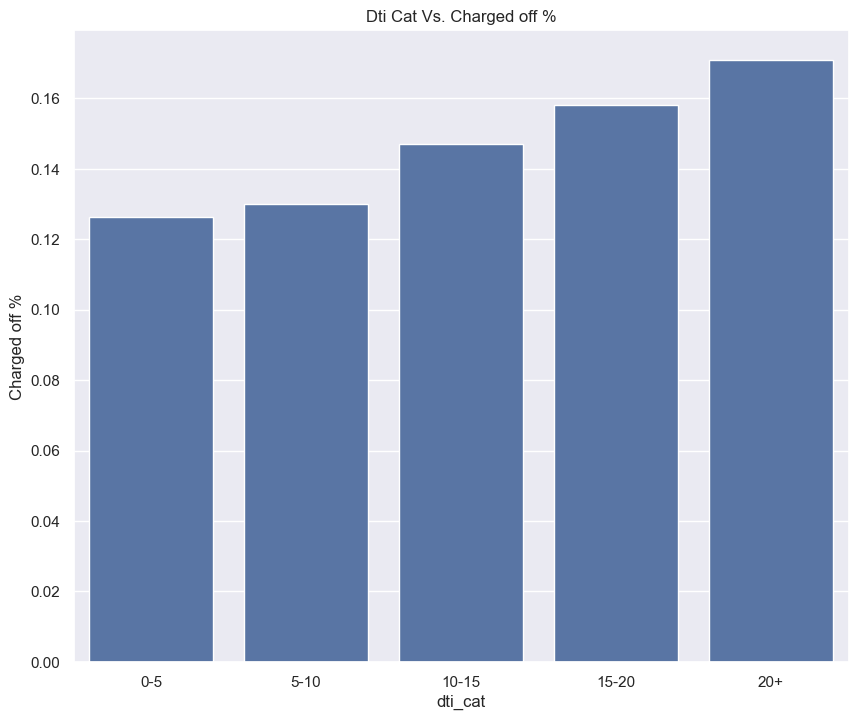

In [69]:
createBivariantePlot(loan_df_final, 'dti_cat')

#### Above stats states that when dept to income ratio is higher, chances of default is high

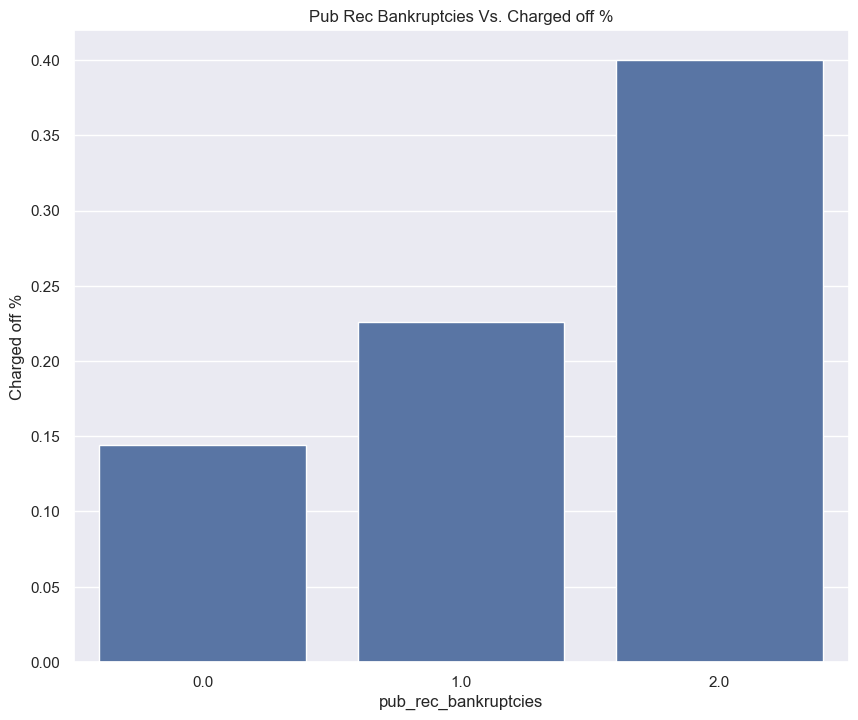

In [70]:
createBivariantePlot(loan_df_final, 'pub_rec_bankruptcies')

#### Above stats states that if a person is bankkrupt once there are high changes they will get defaulter again.

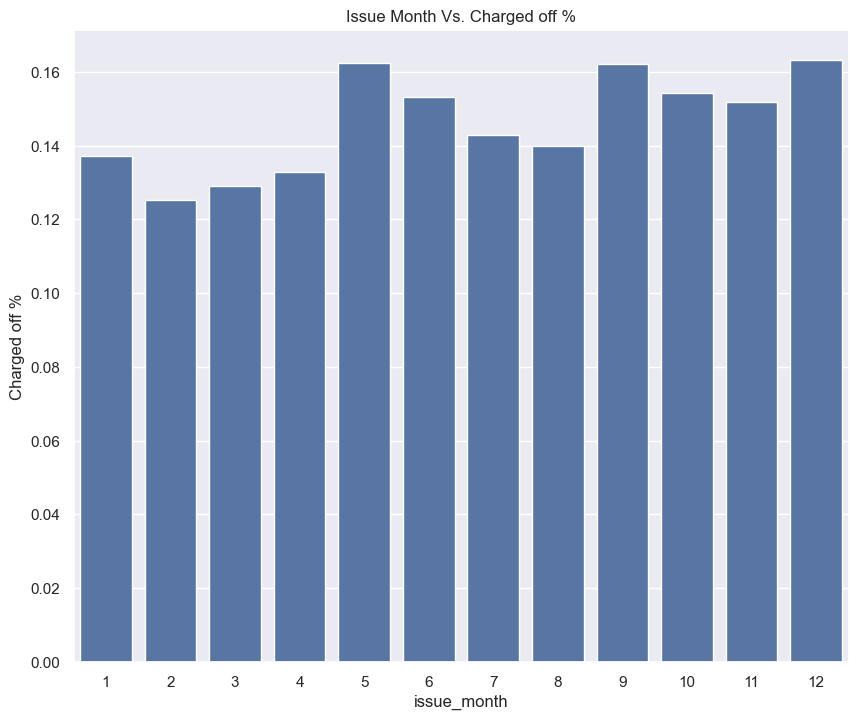

In [71]:
createBivariantePlot(loan_df_final, 'issue_month')

#### Above stats states that default cases are higher in these months-
#### Dec - could be due to holiday season
#### May - new summner session for college in US

## Conclusion

### Factor:
#### 1. higher loan amount
#### 2. term of loan
#### 3. Higher Interest rate
#### 4. Grade of applicant
#### 5. Applicant Home Ownership
#### 6. Applicant verification status
#### 7. Purpose of loan
#### 8. location of Applicant
#### 9. Applicant public record of bankruptcy
#### 10. Loan issue month


### Recommendation

#### 1. recommendation is to keep the loan amount less than 24K USD unless the case is very strong
#### 2. 36 month tenure is recommended as per stats
#### 3. Focus more on higher grade applicants
#### 4. Priorities application who owns an house be it paid off or under mortgage.
#### 5. Verification of application should be done wisely as rate of defaulter is higher for verified accounts.
#### 6. NE,NV, ID states have high default rate, validate the process in those states
#### 7. Avoid giving loan to someone who defaulted even once
#### 8. Purpose of loan should be validate as small business loan with random justification are getting default
#### 9. Loan month is another important criteria as loans during holiday season or for college entrance could get risky.
  